Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Используя математические операции, посчитать коэффициенты линейной регрессии,
приняв за X заработную плату (то есть, zp - признак),
а за y - значения скорингового балла (то есть, ks - целевая переменная).
Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b_with_intercept = np.cov(zp, ks, ddof=0)[0, 1] / np.var(zp, ddof=0)
a_with_intercept = np.mean(ks) - b_with_intercept * np.mean(zp)

b_without_intercept = np.sum(zp * ks) / np.sum(zp ** 2)

print(f"Коэффициент наклона с intercept: {b_with_intercept: .2f}")
print(f"Коэффициент пересечения с осью y: {a_with_intercept: .2f}")

print(f"Коэффициент наклона без intercept: {b_without_intercept: .2f}")

Коэффициент наклона с intercept:  2.62
Коэффициент пересечения с осью y:  444.18
Коэффициент наклона без intercept:  5.89


Таким образом, уравнение линейной регрессии с использованием intercept имеет вид:
y=2.62*x+444.18

А уравнение линейной регрессии без intercept имеет вид:
y=5.89*x

Можно заметить, что в случае без intercept, уравнение проходит не через начало координат, что означает, что при зарплате равной нулю, кредитный скоринг тоже будет равен нулю.

Визуализируем результаты линейной регрессии:

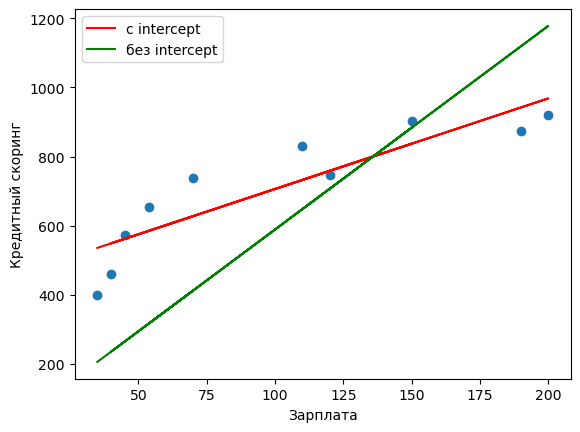

In [2]:
import matplotlib.pyplot as plt

plt.scatter(zp, ks)

plt.plot(zp, b_with_intercept * zp + a_with_intercept,
         color='red', label='с intercept')

plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()

Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Решение:

In [3]:
def gradient_descent(x, y, alpha=0.0001, iterations=1000):
    w = 0
    n = len(x)

    for i in range(iterations):
        y_pred = w * x
        error = y - y_pred
        w += alpha * (1 / n) * np.sum(error * x)

    return w

In [4]:
b_without_intercept = gradient_descent(zp, ks)

print("Коэффициент линейной регрессии без intercept:", b_without_intercept)

Коэффициент линейной регрессии без intercept: 5.889820420132689


Визуализируем результаты линейной регрессии без intercept:

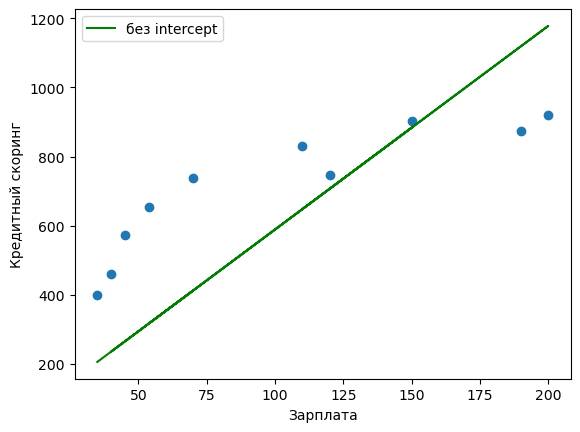

In [5]:
plt.scatter(zp, ks)

plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()

На графике можно видеть, что прямая без intercept проходит через начало координат.
Это отличается от модели линейной регрессии с использованием intercept, которая проходит через точку (0, a).

Задача 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Решение:

In [6]:
x_mean = np.mean(zp)
y_mean = np.mean(ks)

b = np.sum((zp - x_mean) * (ks - y_mean)) / np.sum((zp - x_mean) ** 2)
a = y_mean - b * x_mean

print("Коэффициенты линейной регрессии: a = {:.2f}, b = {:.2f}".format(a, b))

Коэффициенты линейной регрессии: a = 444.18, b = 2.62


Таким образом, уравнение линейной регрессии имеет вид:

y=2.62x+444.18

Теперь мы можем построить линию регрессии на графике:

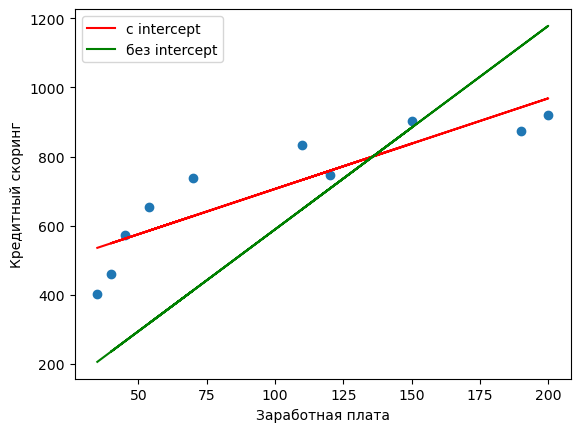

In [7]:
plt.scatter(zp, ks)

plt.plot(zp, b * zp + a, color='red', label='c intercept')


plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()